In [138]:
sectors = ['XLF','VNQ','XLK','VGT','XLE','XLV','XLI','XLY','IBB','AMLP','XLP','GDX','VFH','XLU','VHT']
sec_etf = pdr.get_data_yahoo(sectors,start='2015-4-3', end='2018-4-3')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')
sectors_r.head(10)

[*********************100%***********************]  15 of 15 downloaded


,AMLP,GDX,IBB,VFH,VGT,VHT,VNQ,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,
2015-04-07,0.002402,-0.025888,0.009060,-0.005844,-0.001125,0.001563,-0.017617,0.000632,-0.005361,-0.002328,-0.002154,-0.004645,-0.011512,0.002358,-0.005523
2015-04-08,0.000000,-0.005211,0.029510,0.003243,0.003567,0.010109,0.001544,-0.008084,0.003731,0.003410,0.003119,0.001623,-0.002911,0.008441,0.009388
2015-04-09,0.001798,-0.009429,0.002983,-0.001010,0.004116,0.006549,-0.020752,0.016045,0.001652,0.004829,0.002631,0.002836,-0.004268,0.007546,0.000917
2015-04-10,0.004785,0.028556,0.012434,0.000202,0.004378,0.008626,-0.000727,0.004387,-0.000412,0.014062,0.003817,0.001818,0.007444,0.008580,0.003403
2015-04-13,-0.004167,-0.009769,0.002434,0.003438,-0.004174,-0.003624,-0.002666,-0.009983,0.003713,-0.009479,-0.002852,-0.004637,-0.009852,-0.005401,-0.005478
2015-04-14,0.007770,0.007788,-0.003098,0.000000,-0.003632,0.000728,0.003524,0.018024,0.000000,0.001240,-0.003098,0.002228,0.004975,0.001629,-0.000525
2015-04-15,0.007117,0.029366,0.010442,0.003426,0.009067,0.002253,-0.007507,0.023895,0.003699,0.001770,0.008845,-0.002829,0.002475,0.002575,0.000000
2015-04-16,0.002356,-0.012012,0.001551,0.001406,-0.002038,0.000290,0.002562,-0.002297,0.001638,-0.002120,-0.003555,0.003648,-0.006510,-0.000541,0.001968
2015-04-17,-0.006463,-0.001013,-0.013942,-0.012836,-0.015316,-0.008918,-0.004624,-0.007272,-0.013491,-0.012040,-0.013793,-0.009289,-0.003615,-0.008657,-0.014799


In [141]:
import requests
import pytz
import pandas as pd
import sqlite3 as db
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import scipy.optimize as opt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override()

import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
sectors = ['USO','WTI']
sec_etf = pdr.get_data_yahoo(sectors,start='2015-4-3', end='2018-4-3')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')
sectors_r.head(10)
#sectors_r['USO R']=

[*********************100%***********************]  2 of 2 downloaded


,USO,WTI
Date,,
2015-04-07,0.034183,0.022034
2015-04-08,-0.051941,-0.049751
2015-04-09,-0.002214,0.019197
2015-04-10,0.021076,0.011986
2015-04-13,0.004889,0.023689
2015-04-14,0.017297,0.049587
2015-04-15,0.047290,0.078740
2015-04-16,0.011669,0.001460
2015-04-17,-0.005015,-0.017493


In [ ]:
#sectors_r['USO R'] = 0
#for i in range(0, len(sectors_r)+1):
#    sectors_r['USO R'][i+1] = sectors_r['USO'][i+1] - sectors_r['USO'][i] + sectors_r['USO R'][i]

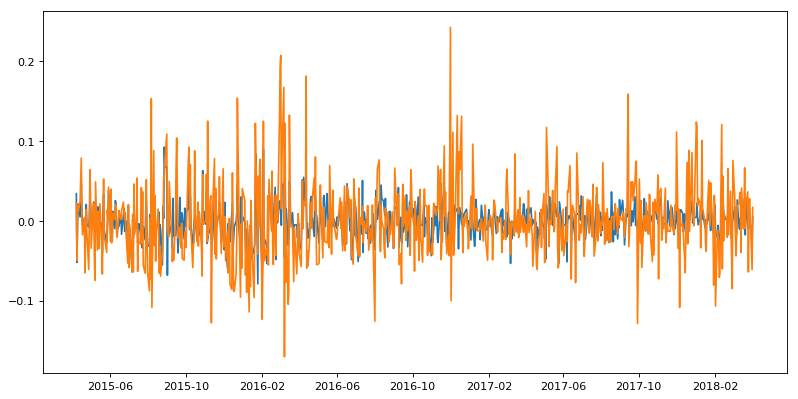

In [143]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(sectors_r.index, sectors_r['USO'], sectors_r['WTI'])

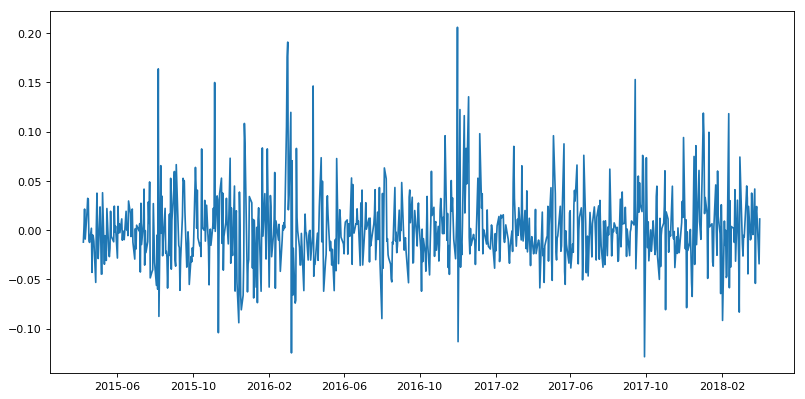

In [144]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(sectors_r.index, sectors_r['WTI']-sectors_r['USO'])

It is Contango when the price of WTI-USO is above the y=0 axis, it is backwardation when the price of WTI-USO is below the y=0 axis.

In [145]:
file = 'Borrow_2018_4_4 copy.csv'
df_etf = pd.read_csv(file)
df_etf.head(10)

,#BOF,2018.04.04,13:00:02,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,#SYM,CUR,NAME,CON,ISIN,REBATERATE,FEERATE,AVAILABLE
1,#EOF,12534,NaN,NaN,NaN,NaN,NaN,NaN
2,A,USD,AGILENT TECHNOLOGIES INC,1715006,XXXXXXXU1016,1.2759,0.4041,>10000000
3,AA,USD,ALCOA CORP,251962528,XXXXXXX21065,1.2957,0.3843,6800000
4,AABA,USD,ALTABA INC,278946664,XXXXXXX61017,1.3747,0.3053,>10000000
5,AABVF,USD,ABERDEEN INTERNATIONAL INC.,60152167,CA0030691012,-13.2664,14.9464,20000
6,AAC,USD,AAC HOLDINGS INC,169041192,XXXXXXX71083,0.3225,1.3575,400000
7,AACAY,USD,AAC TECHNOLOGIES H-UNSPON AD,54939868,XXXXXXX41052,-34.4659,36.1459,400
8,AACS,USD,AMERICAN COMMERCE SOLUTIONS,30207299,XXXXXXX91008,1.43,0.25,2200000
9,AACTF,USD,AURORA SOLAR TECHNOLOGIES IN,195675323,CA05207J1084,-2.1597,3.8397,5000


In [146]:
df_etf = df_etf.reset_index().rename(columns={'#BOF':'#SYM','2018.04.04':'CUR','13:00:02':'NAME','Unnamed: 3':'CON',
                                              'Unnamed: 4':'ISIN','Unnamed: 5':'REBATERATE','Unnamed: 6':'FEERATE','Unnamed: 7':'AVAILABLE'})
#rename the index

#df_etf.drop(df_etf.index[[0,1]])
#drop two rows

In [147]:
df_etf.columns

Index(['index', '#SYM', 'CUR', 'NAME', 'CON', 'ISIN', 'REBATERATE', 'FEERATE',
       'AVAILABLE'],
      dtype='object')

In [148]:
#calculate the rate / (rebate rate - fee rate) is the rate of income (for 1/4 of the year)
print(df_etf.loc[df_etf['#SYM']=='FAS']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='FAS']['FEERATE'].values)
rate_fas = -0.5024 - 2.1824
print(df_etf.loc[df_etf['#SYM']=='FAZ']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='FAZ']['FEERATE'].values)
rate_faz = -11.0418 - 12.7218
print(df_etf.loc[df_etf['#SYM']=='UYG']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='UYG']['FEERATE'].values)
rate_uyg = -2.9435 - 4.6235
print(df_etf.loc[df_etf['#SYM']=='SKF']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='SKF']['FEERATE'].values)
rate_skf = -11.778-13.458
print(df_etf.loc[df_etf['#SYM']=='EDZ']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='EDZ']['FEERATE'].values)
rate_edz = -11.3027 - 12.9827
print(df_etf.loc[df_etf['#SYM']=='EDC']['REBATERATE'].values)
print(df_etf.loc[df_etf['#SYM']=='EDC']['FEERATE'].values)
rate_edc = -5.2936 - 6.9736
#print(df_etf['#SYM']['A'])

['-0.5024']
['2.1824']
['-11.0418']
['12.7218']
['-2.9435']
['4.6235']
['-11.778']
['13.458']
['-11.3027']
['12.9827']
['-5.2936']
['6.9736']


In [162]:
import sys
sectors = ['FAS','FAZ']
sec_etf = pdr.get_data_yahoo(sectors,start='2018-1-1', end='2018-4-1')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')
sectors_r.head(10)
#sectors_r['FAS_R'] = 0
#for i in range(1, len(sectors_r)):
#    sectors_r['FAS_R'][i] = sectors_r['FAS'][i] - sectors_r['FAS'][i-1] + sectors_r['FAS_R'][i-1]

[*********************100%***********************]  2 of 2 downloaded


,FAS,FAZ
Date,,
2018-01-03,0.013541,-0.013571
2018-01-04,0.015393,-0.016337
2018-01-05,0.014588,-0.014860
2018-01-08,0.001551,-0.001775
2018-01-09,0.010415,-0.009778
2018-01-10,0.009890,-0.009874
2018-01-11,0.011448,-0.011786
2018-01-12,0.016092,-0.015596
2018-01-16,-0.006040,0.006524


In [153]:
import numpy as np

ret_s = sectors_r['FAS']+1
returns_s = np.zeros(len(ret_s))
for i in range(len(ret_s)):
    returns_s[i] = np.prod((ret_s[:i]))
returns_s = returns_s * (1 + rate_fas * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4
print(returns_s)

[0.993288   1.00673843 1.02223563 1.0371482  1.03875638 1.04957519
 1.05995542 1.07209021 1.08934186 1.08276274 1.10937129 1.10133026
 1.12413759 1.15191574 1.16200365 1.17530781 1.17238388 1.19460634
 1.17121428 1.13597983 1.15206201 1.16522002 1.0938741  0.95074345
 0.9940189  0.99314173 0.88466071 0.92106474 0.95381365 0.96755661
 1.01872684 1.04138801 1.04475054 1.03086151 1.01755724 1.00703074
 1.0526454  1.08904942 1.05469227 1.02267422 0.97910644 0.98904808
 1.0289609  1.04065699 1.04197274 1.0507449  1.11375737 1.10864039
 1.08232416 1.0592244  1.0592244  1.0697509  1.04182659 1.0514491
 1.04266141 0.94877936 0.87408387 0.94775413 0.89956819 0.9087953 ]


In [163]:
ret_z1 = sectors_r['FAZ']+1
returns_z1 = np.zeros(len(ret_z1))
for i in range(len(ret_z1)):
    returns_z1[i] = np.prod((ret_z1[:i]))
returns_z1 = returns_z1 * (1 + rate_faz * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4
print(returns_z1)

[0.940591   0.92782647 0.91266849 0.89910623 0.8975106  0.88873498
 0.87995919 0.86958794 0.85602559 0.8616102  0.84086762 0.8448566
 0.82810308 0.80656277 0.8001805  0.78980933 0.79220269 0.77864026
 0.79379823 0.81693402 0.80656277 0.79698941 0.84405879 0.9573446
 0.91346631 0.91346631 1.0259543  0.96691804 0.93261319 0.91905084
 0.87118356 0.85123895 0.84804778 0.86001458 0.8687902  0.87995919
 0.84006988 0.81055175 0.8360809  0.86081239 0.8975106  0.88713935
 0.85123895 0.84405879 0.84166543 0.83528316 0.78502261 0.78741597
 0.80576503 0.82331636 0.82251863 0.81533855 0.83528316 0.82849224
 0.83568263 0.91078222 0.98268608 0.90119504 0.94513628 0.93475017]


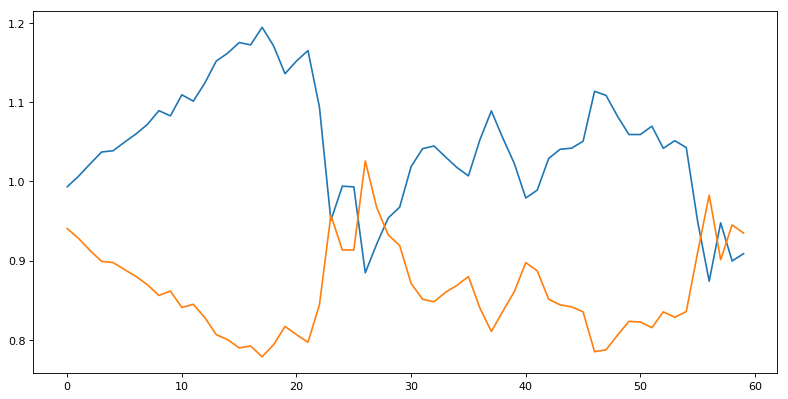

In [164]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(returns_s)
plt.plot(returns_z1)
#x axis is from 2018-1-1 to 2018-4-1

[*********************100%***********************]  2 of 2 downloaded


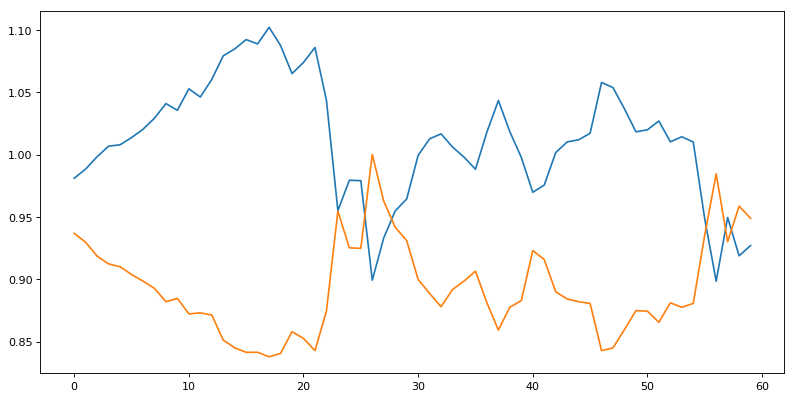

In [165]:
sectors = ['UYG','SKF']
sec_etf = pdr.get_data_yahoo(sectors,start='2018-1-1', end='2018-4-1')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')

ret_g = sectors_r['UYG']+1
returns_g = np.zeros(len(ret_g))
for i in range(len(ret_g)):
    returns_g[i] = np.prod((ret_g[:i]))
returns_g = returns_g * (1 + rate_uyg * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4


ret_f = sectors_r['SKF']+1
returns_f = np.zeros(len(ret_f))
for i in range(len(ret_f)):
    returns_f[i] = np.prod((ret_f[:i]))
returns_f = returns_f * (1 + rate_skf * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4


plt.figure(figsize=(12, 6), dpi=80)
plt.plot(returns_g)
plt.plot(returns_f)
#x axis is from 2018-1-1 to 2018-4-1

[*********************100%***********************]  2 of 2 downloaded


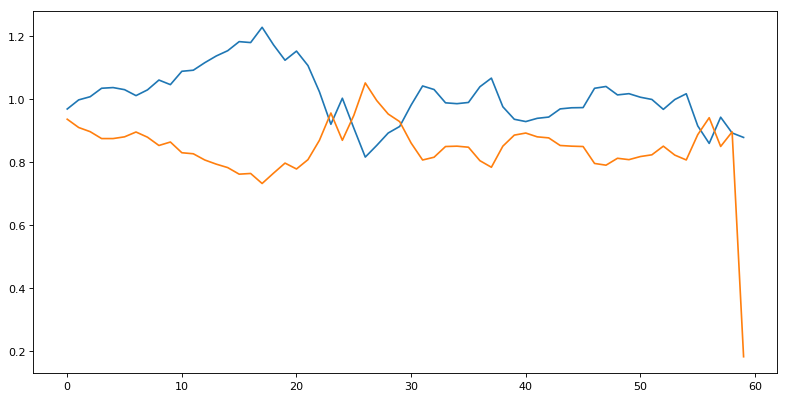

In [166]:
sectors = ['EDC','EDZ']
sec_etf = pdr.get_data_yahoo(sectors,start='2018-1-1', end='2018-4-1')
sectors_r = sec_etf['Adj Close'].pct_change().dropna(axis=0, how='any')
ret_c = sectors_r['EDC']+1
returns_c = np.zeros(len(ret_c))
for i in range(len(ret_c)):
    returns_c[i] = np.prod((ret_c[:i]))
returns_c = returns_c * (1 + rate_edc * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4


ret_z2 = sectors_r['EDZ']+1
returns_z2 = np.zeros(len(ret_z2))
for i in range(len(ret_z2)):
    returns_z2[i] = np.prod((ret_z2[:i]))
returns_z2 = returns_z2 * (1 + rate_skf * 1/100 * 1/4) # percentilize rate so 1/100, make annual rate into quater so 1/4


plt.figure(figsize=(12, 6), dpi=80)
plt.plot(returns_c)
plt.plot(returns_z2)
#x axis is from 2018-1-1 to 2018-4-1

In [159]:
pair_1 = []
for i in range(len(ret_s)):
    pair_1[i] = returns_s[i] + returns_z[i]
plt.plot(pair_1)

IndexError: list assignment index out of range

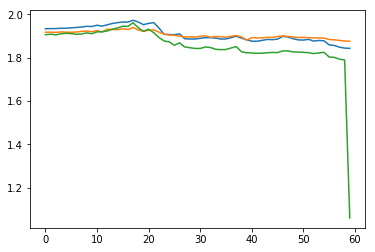

In [168]:
pair_1 = returns_s + returns_z1
pair_2 = returns_g + returns_f
pair_3 = returns_c + returns_z2
plt.plot(pair_1)
plt.plot(pair_2)
plt.plot(pair_3)

In the graph, the rate goes up until day 23rd, then it keeps going down. When the rate goes up, it is backwardation; because we lose money by buying the future on the first day,and selling it on the second day.  When the rate goes down, it is contango; because we can make money by shorting the future on the first day,and selling it on the second day.